# INFORMACIÓN DEL PROYECTO

### TÍTULO

## Análisis de la evolución de crisis económicas: impacto de la inflación y expectativas de crecimiento en el consumo del sector turístico/hotelero"

### TEMA

## Estudio de la evolución de la afectación del consumo en el ambito internacional integrando dos vertientes macro:
## - Inflacion 
## - Expectativas de crecimiento economico.

### HIPÓTESIS

## Evaluacion de la tendencia historico, para obervar como ha sido la afectacion de las sucesivas eventualidades en el mercado 

Contraste de la magnitud el binomio causalidad - efecto, en los diferentes acontecimientos destacados desde los registros obtenidos.

## OBTENCIÓN DE LOS DATOS

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

- World Bank - https://www.worldbank.org/en/home
- Segittur - https://www.dataestur.es/apidata/
- Ine - Gob españa
- Bbva Observatorio

Video ilustrativo de la idea de exploratirio.
Monitorizacion de pagos en tiempo real durante la Semana de vacaciondes de Seman Santa 
https://www.youtube.com/watch?v=8J3T3UjHbrE

![Alt text](Road%20Map%20EDA.jpg)

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Global Consumption Clustering

# Clean data

In [238]:
  
df = pd.read_excel("Consumption global.xls")

In [239]:
# df_1 Consumption Global
df_1 = df
df_1.set_index('Data Source', inplace = True)
df_1= df_1.reset_index()
df_1.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,Last Updated Date,2023-05-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1.980000e+03,1.981000e+03,1.982000e+03,1.983000e+03,1.984000e+03,1.985000e+03,1.986000e+03,1.987000e+03,1.988000e+03,1.989000e+03,1.990000e+03,1.991000e+03,1.992000e+03,1.993000e+03,1.994000e+03,1.995000e+03,1.996000e+03,1.997000e+03,1.998000e+03,1.999000e+03,2.000000e+03,2.001000e+03,2.002000e+03,2.003000e+03,2.004000e+03,2.005000e+03,2.006000e+03,2.007000e+03,2.008000e+03,2.009000e+03,2.010000e+03,2.011000e+03,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2.017000e+03,2.018000e+03,2.019000e+03,2.020000e+03,2.021000e+03,2022.0
3,Aruba,ABW,Final consumption expenditure (current US$),NE.CON.TOTL.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.301676e+08,1.015642e+09,1.125140e+09,1.203911e+09,1.271508e+09,1.326257e+09,1.410615e+09,1.520112e+09,1.603352e+09,1.683240e+09,1.787709e+09,1.910056e+09,2.091061e+09,2.159218e+09,2.096089e+09,2.127933e+09,2.308939e+09,2.272626e+09,2.317877e+09,2.322346e+09,2.328492e+09,2.327933e+09,2.416760e+09,2.537430e+09,2.617661e+09,2.353441e+09,2.485215e+09,NaN
4,Africa Eastern and Southern,AFE,Final consumption expenditure (current US$),NE.CON.TOTL.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.104673e+11,1.208300e+11,1.166312e+11,1.255144e+11,1.179152e+11,9.407384e+10,1.086603e+11,1.401125e+11,1.520721e+11,1.626945e+11,2.008628e+11,2.189308e+11,1.925350e+11,1.892095e+11,2.023450e+11,2.263033e+11,2.229207e+11,2.379261e+11,2.265053e+11,2.222035e+11,2.360269e+11,2.142620e+11,2.142240e+11,2.863704e+11,3.563102e+11,4.073689e+11,4.453639e+11,5.059647e+11,5.305440e+11,5.630155e+11,6.723081e+11,7.532912e+11,7.793224e+11,7.929590e+11,7.918409e+11,7.452465e+11,7.161344e+11,8.084458e+11,8.184649e+11,8.077255e+11,7.502285e+11,8.676975e+11,NaN


In [240]:
# Obtener la fila de cabecera y renombrar las columnas del DataFrame
cabecera = df_1.iloc[2]
df_1 = df_1.rename(columns=cabecera)
df_1.columns = df_1.columns.astype(str).str.split('.').str[0]
df_1 = df_1.rename(columns=lambda x: x.split('.')[0] if '.' in x else x)

# Eliminar filas y columnas innecesarias
df_1 = df_1.drop([0, 1, 2])
df_1 = df_1.drop(['Indicator Name', 'Indicator Code'], axis=1)

# Restablecer los índices del DataFrame resultante
df_1 = df_1.reset_index(drop=True)

# Eliminar filas con nombres de país que tienen más de 3 palabras
df_1 = df_1[df_1['Country Name'].str.split().str.len() <= 3]

# Calcular la cantidad de valores NaN por fila
df_1['NaN Count'] = df_1.isna().sum(axis=1)

# Ordenar el DataFrame por la columna 'NaN Count' en orden ascendente
df_1_sorted = df_1.sort_values('NaN Count')




In [241]:
df_1 = df_1_sorted.reset_index(drop=True)
df_1 = df_1.rename(columns={'Country Code': 'LOCATION'})

df_1.head()

,Country Name,LOCATION,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,NaN Count
0,Zimbabwe,ZWE,9.284669e+08,9.413203e+08,9.633679e+08,1.019981e+09,1.093372e+09,1.132393e+09,1.090142e+09,1.153566e+09,1.167060e+09,1.452735e+09,1.538685e+09,1.739245e+09,2.042981e+09,2.552321e+09,2.996817e+09,3.338254e+09,3.540199e+09,3.577473e+09,3.836677e+09,4.732736e+09,5.858302e+09,7.055351e+09,7.544412e+09,7.078168e+09,5.309292e+09,4.621112e+09,4.937386e+09,5.548478e+09,6.088400e+09,6.906060e+09,7.251226e+09,7.274255e+09,6.010295e+09,5.182118e+09,5.387862e+09,5.891586e+09,6.871688e+09,7.664987e+09,5.184148e+09,5.603629e+09,5.631504e+09,5.944686e+09,6.224010e+09,5.593444e+09,5.956015e+09,6.182323e+09,5.952201e+09,5.370927e+09,5.363314e+09,1.063978e+10,1.265326e+10,1.444984e+10,1.950734e+10,2.013558e+10,2.011394e+10,2.163859e+10,2.085086e+10,1.776281e+10,3.008262e+10,1.846162e+10,1.928784e+10,2.553136e+10,NaN,1
1,Jamaica,JAM,5.333524e+08,5.539166e+08,5.854907e+08,6.188383e+08,7.075012e+08,7.492650e+08,7.720846e+08,8.206297e+08,7.626305e+08,8.522741e+08,1.020521e+09,1.155379e+09,1.517915e+09,1.488143e+09,2.040370e+09,2.419316e+09,2.688153e+09,2.807392e+09,2.161395e+09,1.978978e+09,2.252554e+09,2.631133e+09,2.955316e+09,3.079029e+09,1.967891e+09,1.796298e+09,2.206360e+09,2.597281e+09,3.083045e+09,3.619730e+09,3.578675e+09,3.180119e+09,2.677095e+09,3.776044e+09,4.146993e+09,5.251536e+09,6.038616e+09,6.897400e+09,7.469850e+09,7.544687e+09,7.966742e+09,8.074715e+09,8.648481e+09,8.362374e+09,8.929575e+09,1.045667e+10,1.098294e+10,1.218724e+10,1.444152e+10,1.174106e+10,1.296186e+10,1.468274e+10,1.506465e+10,1.438515e+10,1.386558e+10,1.346846e+10,1.288621e+10,1.357647e+10,1.408515e+10,1.421118e+10,1.260391e+10,1.283783e+10,NaN,1
2,Algeria,DZA,2.253355e+09,1.754578e+09,1.344135e+09,2.231679e+09,2.383643e+09,2.528615e+09,2.472700e+09,2.520141e+09,2.819121e+09,3.062185e+09,3.425396e+09,3.754094e+09,4.802700e+09,5.729929e+09,7.493284e+09,9.936827e+09,1.076355e+10,1.347214e+10,1.645501e+10,1.967064e+10,2.410486e+10,2.629872e+10,2.748138e+10,2.942282e+10,3.575872e+10,3.973905e+10,4.889097e+10,5.111656e+10,4.695002e+10,4.439713e+10,4.523584e+10,2.863654e+10,3.254244e+10,3.609276e+10,3.124492e+10,3.002558e+10,3.215772e+10,3.275322e+10,3.507550e+10,3.326106e+10,3.021964e+10,3.201826e+10,3.375637e+10,3.751950e+10,4.465576e+10,4.665778e+10,5.024939e+10,5.848870e+10,7.419617e+10,7.368859e+10,8.309795e+10,1.036965e+11,1.096841e+11,1.128345e+11,1.195056e+11,1.038546e+11,1.014664e+11,1.046321e+11,1.036736e+11,1.059608e+11,9.980612e+10,1.018485e+11,NaN,1
3,India,IND,3.479232e+10,3.654097e+10,3.891523e+10,4.377812e+10,5.111781e+10,5.439457e+10,4.285104e+10,4.739306e+10,4.779988e+10,5.188174e+10,5.532624e+10,6.058451e+10,6.403613e+10,7.517984e+10,8.981071e+10,8.589020e+10,8.709312e+10,1.038061e+11,1.180622e+11,1.311009e+11,1.630310e+11,1.659542e+11,1.712490e+11,1.869108e+11,1.802508e+11,1.950986e+11,2.109145e+11,2.326543e+11,2.423841e+11,2.360498e+11,2.515212e+11,2.109436e+11,2.209388e+11,2.135336e+11,2.463621e+11,2.674759e+11,2.942253e+11,3.116536e+11,3.190415e+11,3.495522e+11,3.545132e+11,3.684901e+11,3.828241e+11,4.398525e+11,4.875839e+11,5.557664e+11,6.197480e+11,7.984538e+11,8.058412e+11,9.046940e+11,1.101423e+12,1.226761e+12,1.227164e+12,1.261474e+12,1.398201e+12,1.460638e+12,1.597267e+12,1.842571e+12,1.895066e+12,2.036473e+12,1.943557e+12,2.245422e+12,NaN,1
4,Botswana,BWA,3.346390e+07,3.618427e+07,3.906912e+07,4.176597e+07,4.474418e+07,4.837359e+07,5.139470e+07,5.906485e+07,7.231520e+07,7.081186e+07,8.752094e+07,9.938237e+07,1.187888e+08,1.763435e+08,2.325239e+08,2.780933e+08,3.056578e+08,3.836105e+08,4.728930e+08,6.059509e+08,7.779851e+08,8.421178e+08,7.820239e+08,8.333941e+08,8.401109e+08,6.905550e

In [242]:

# Saber cuantos paises me quedan si sesgo por 30 años NaN
mask = df_1['NaN Count'] > 40
mask.value_counts()
# Compruebo el sesgo relevante cambiando el valor de la mask

False    181
True      52
Name: NaN Count, dtype: int64

In [243]:
# Drop mask
df_1 =df_1.drop('NaN Count', axis=1)

In [244]:
# Copia backup
df_copia = df_1.copy()

In [299]:
# Lista Asia
lista_Asia = ["CHN", "IND", "JPN", "KOR", "RUS", "IDN", "TUR"]
# Lista NA
lista_NA = ['USA', 'USA', 'MEX']
# Lista g20
list_g20 = ['DEU', 'SAU', 'ARG', 'AUS', 'BRA', 'CAN', 'CHN', 'KOR', 'USA', 'FRA', 'IND', 'IDN', 'ITA', 'JPN', 'MEX', 'GBR', 'RUS']


## Observamos la tendencia de crecimiento constante.

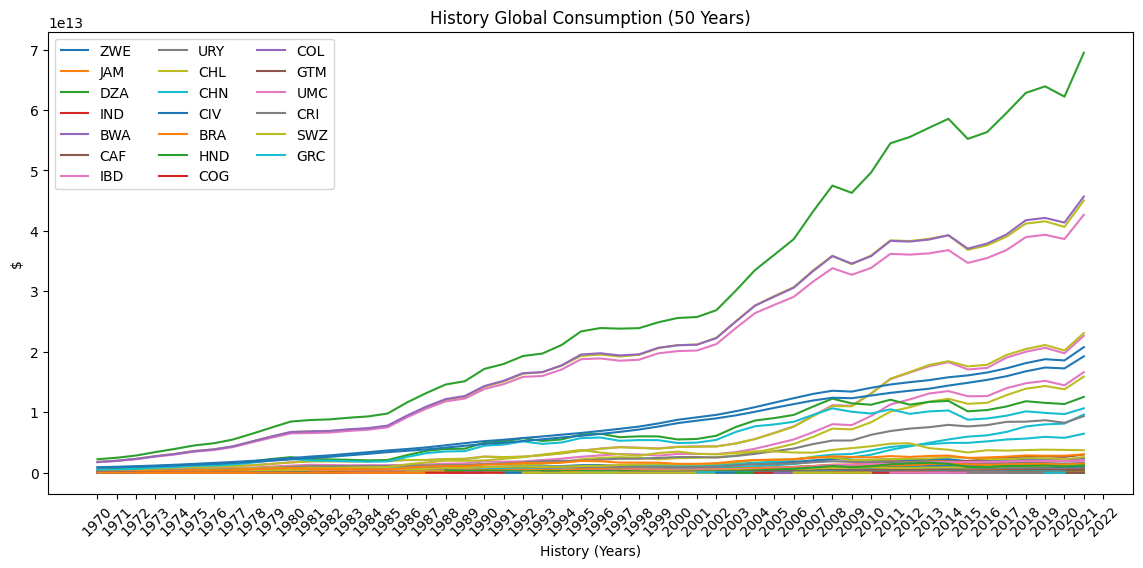

In [246]:

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize =(14,6))

# Obtener las filas del df
x = df_1.columns[12:] # Omitir las primeras dos columnas (nombre del país y código)

filas = df_1.values.tolist()

# Iterar sobre cada fila (Lista de valores de filas)
for fila in filas:
    # Obtener los datos de la fila para el eje y
    datos_y = fila[12:]  # Omitir las primeras dos columnas (nombre del país y código)
    
    # Trazar la línea utilizando los datos de x e y
    ax.plot(x, datos_y)

# Etiquetas y título
plt.xlabel('History (Years)')
plt.ylabel('$') # Dolares
plt.title('History Global Consumption (50 Years)')
# Legend
plt.legend(df_1.iloc[:20, 1], ncol=3)
# Rotar los ticks del eje x para mejorar la legibilidad
plt.xticks(rotation=45)
# Mostrar la gráfica
plt.show()

### Zoom desde 2003

CONsumo inter anueal



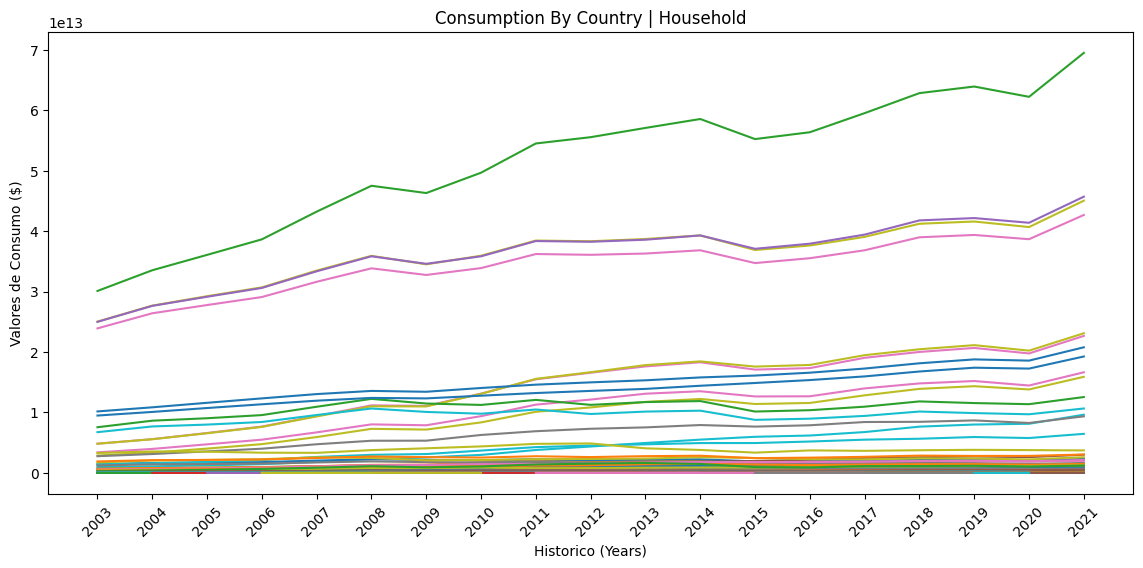

In [247]:
# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize =(14,6))

# Obtener las filas y columnas del df
# Omitir las primeras dos columnas (nombre del país y código)
x = df_1.columns[45:] 
filas = df_1.values.tolist()

# Iterar sobre cada fila (Lista de valores de filas)
for fila in filas:
    # Obtener los datos de la fila para el eje y
    datos_y = fila[45:]  # Omitir las primeras dos columnas (nombre del país y código)
    
    # Trazar la línea utilizando los datos de x e y
    ax.plot(x, datos_y)

# Etiquetas y título
plt.xlabel('Historico (Years)')
plt.ylabel('Valores de Consumo ($)')
plt.title('Consumption By Country | Household')

# Rotar los ticks del eje x para mejorar la legibilidad
plt.xticks(rotation=45)
# Mostrar la gráfica
plt.show()

## Consumo paises hemisferio norte en periodos inter crisis:

In [294]:
df_C_EU = pd.read_csv('C_Comp_EU.csv')
df_C_EU.head(20)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,HUN,HHWEALTH,TOT,PC_NDI,A,1995,264.1895,NaN
1,HUN,HHWEALTH,TOT,PC_NDI,A,1996,289.8627,NaN
2,HUN,HHWEALTH,TOT,PC_NDI,A,1997,306.5918,NaN
3,HUN,HHWEALTH,TOT,PC_NDI,A,1998,305.4271,NaN
4,HUN,HHWEALTH,TOT,PC_NDI,A,1999,325.9615,NaN
5,HUN,HHWEALTH,TOT,PC_NDI,A,2000,331.0537,NaN
6,HUN,HHWEALTH,TOT,PC_NDI,A,2001,322.6171,NaN
7,HUN,HHWEALTH,TOT,PC_NDI,A,2002,312.7130,NaN
8,HUN,HHWEALTH,TOT,PC_NDI,A,2003,300.4218,NaN
9,HUN,HHWEALTH,TOT,PC_NDI,A,2004,290.0046,NaN


In [249]:
# G20 Consumption

def plot_locations(df, locations):
    filtered_data = df[df['LOCATION'].isin(locations)]

    plt.figure(figsize=(15, 6))

    for location in locations:
        location_data = filtered_data[filtered_data['LOCATION'] == location]
        plt.plot(location_data['TIME'], location_data['Value'], label=location)

    plt.xlabel('Año')
    plt.ylabel('Valor promedio')
    plt.title('G20 1995 - 2022')
    plt.legend(loc=2, ncol=2)
    plt.show()


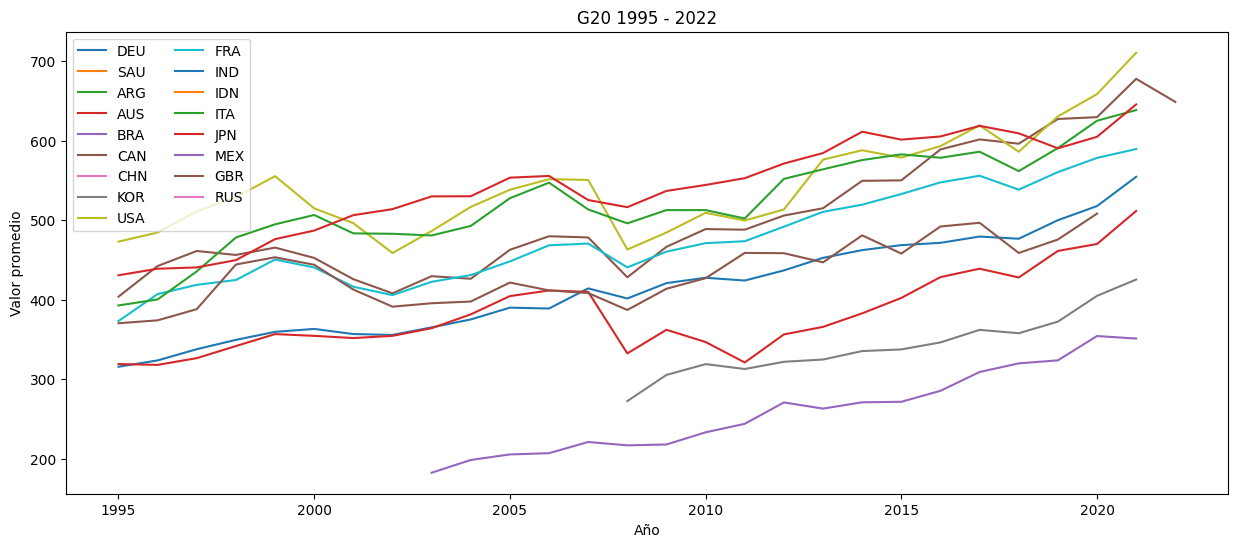

In [250]:
plot_locations(df_C_EU,list_g20)

In [251]:
# Visualizacion de lista de paises
paises = [ 'CAN','DEU', 'ESP', 'FRA', 'GBR', 'JPN', 'KOR', 'MEX', 'USA' ]

# Mostrar lista de paises preferentes a visualizar
C_filteres = df_C_EU[df_C_EU['LOCATION'].isin(paises)]


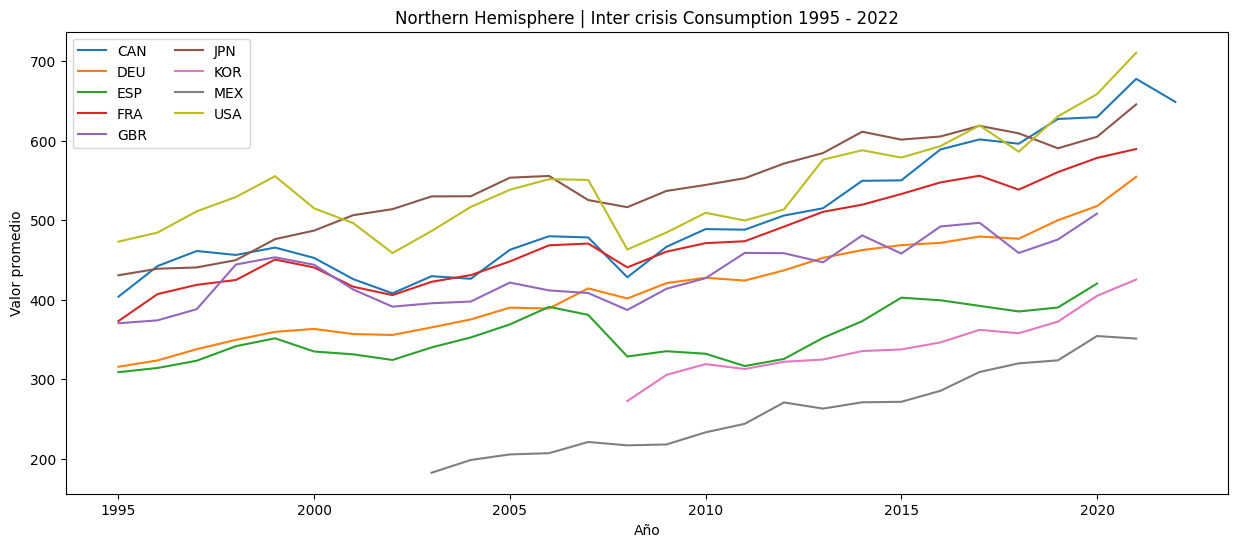

In [252]:
plt.figure(figsize=(15, 6))

for pais in paises:
    pais_data = C_filteres[C_filteres['LOCATION'] == pais]
    plt.plot(pais_data['TIME'], pais_data['Value'], label=pais)

plt.xlabel('Año')
plt.ylabel('Valor promedio')
plt.title('Northern Hemisphere | Inter crisis Consumption 1995 - 2022')
plt.legend(loc =2 ,ncol= 2)
plt.show()


## Data GDP Visualization 

In [296]:
w_ocd_ue_GDP = pd.read_csv('tabala comparacion.csv')
w_ocd_ue_GDP.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUT,REALGDPFORECAST,TOT,AGRWTH,A,1991,3.441627,NaN
1,AUT,REALGDPFORECAST,TOT,AGRWTH,A,1992,2.093525,NaN
2,AUT,REALGDPFORECAST,TOT,AGRWTH,A,1993,0.526809,NaN
3,AUT,REALGDPFORECAST,TOT,AGRWTH,A,1994,2.402119,NaN
4,AUT,REALGDPFORECAST,TOT,AGRWTH,A,1995,2.667984,NaN


In [254]:
# valores de world 1991 - actualidad
world = [3.4, 3.6, 2.6, 3.7, 3.5, 4.0, 4.2, 2.7, 3.5, 4.9, 2.4, 2.9, 3.9, 5.2, 4.8, 5.3, 5.4, 3.1, -0.4, 5.4, 4.1, 3.4, 3.4, 3.5, 3.3, 3.2, 3.7, 3.6, 2.8, -3.2, 5.9, 3.1, 2.2]

In [255]:
## Data frame bueno  w_ocd_ue_GDP

# Obtener el número de filas a agregar
num_rows = len(world)

# Crear una lista de diccionarios con los datos de las nuevas filas
new_rows = []
for i, value in enumerate(world):
    new_row = {
        'LOCATION': 'WLD',
        'INDICATOR': w_ocd_ue_GDP['INDICATOR'].iloc[i],
        'SUBJECT': w_ocd_ue_GDP['SUBJECT'].iloc[i],
        'MEASURE': w_ocd_ue_GDP['MEASURE'].iloc[i],
        'FREQUENCY': w_ocd_ue_GDP['FREQUENCY'].iloc[i],
        'TIME': w_ocd_ue_GDP['TIME'].iloc[i],
        'Value': value,
        'Flag Codes': 'NAN'
    }
    new_rows.append(new_row)

# Agregar las nuevas filas al DataFrame
w_ocd_ue_GDP = w_ocd_ue_GDP.append(new_rows, ignore_index=True)

C:\Users\34680\AppData\Local\Temp\ipykernel_25540\970244969.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w_ocd_ue_GDP = w_ocd_ue_GDP.append(new_rows, ignore_index=True)


hacer funcion para impletacion de busquedas pasardo una lista de locations como arguento

grafica 7

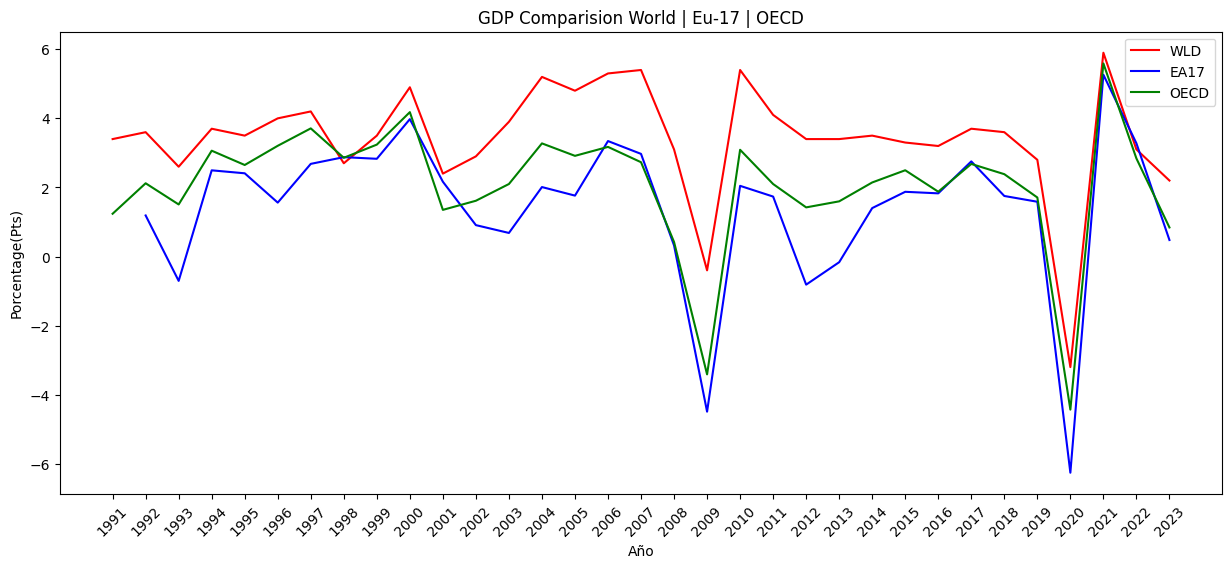

In [256]:
# plotear tb worl 
w = w_ocd_ue_GDP.loc[w_ocd_ue_GDP['LOCATION'] == 'WLD']
w_grouped = w.groupby(['LOCATION','TIME'])['Value'].mean().reset_index()

# plotear EA17 
ea17 = w_ocd_ue_GDP.loc[w_ocd_ue_GDP['LOCATION'] == 'EA17']
ea17_grouped = ea17.groupby(['LOCATION','TIME'])['Value'].mean().reset_index()
# plotear OECD
oecd = w_ocd_ue_GDP.loc[w_ocd_ue_GDP['LOCATION'] == 'OECD']
oecd_grouped = oecd.groupby(['LOCATION','TIME'])['Value'].mean().reset_index()


plt.figure(figsize=(15, 6))
# Añadir ambos ocd y world
plt.plot(w_grouped['TIME'], w_grouped['Value'],color='red',label='WLD' ) #red
plt.plot(ea17_grouped['TIME'], ea17_grouped['Value'],color='b',label='EA17') #blue
plt.plot(oecd_grouped['TIME'], oecd_grouped['Value'],color='g',label='OECD') #green


# Titulo leyenda y ejes
plt.title('GDP Comparision World | Eu-17 | OECD')
plt.xlabel('Año')
plt.ylabel('Porcentage(Pts)')
plt.legend()

plt.xticks(oecd_grouped['TIME'], rotation=45)
plt.show()

## DF2 + Pivot table For unique country display

In [288]:
df2 = pd.read_csv('Growth global.csv')
# df2

In [ ]:
# Obtener el DataFrame original sin las columnas especificadas | CLustering
df_2filtered = df2.drop(["INDICATOR", "SUBJECT", "MEASURE", "FREQUENCY", "Flag Codes"], axis=1)

#  Pivot table for county plot
df_pivot = df_2filtered.pivot(index='LOCATION', columns='TIME', values='Value')

#LImpieza de Cuatrmestres

filtered_data = df_pivot.filter(regex=r'^(?!.*Q).*$')


# Calcula la suma de NaN por fila
filtered_data['NaN Count'] = filtered_data.isna().sum(axis=1)

# Ordena el DataFrame por la columna 'NaN Count' de manera descendente
sorted_data = filtered_data.sort_values('NaN Count')


# Quita 9 primeras filas (años 1961-1991)
sorted_data = sorted_data.drop(sorted_data.columns[:10], axis=1)





In [293]:
# Graficar paises
# Hago un Transpose para ver los paises por columnas 
data_transposed = sorted_data.transpose()
# Dejo caer fila de NAN values antigua columna para sorted()
data_transposed = data_transposed.iloc[:-1]
# data_transposed


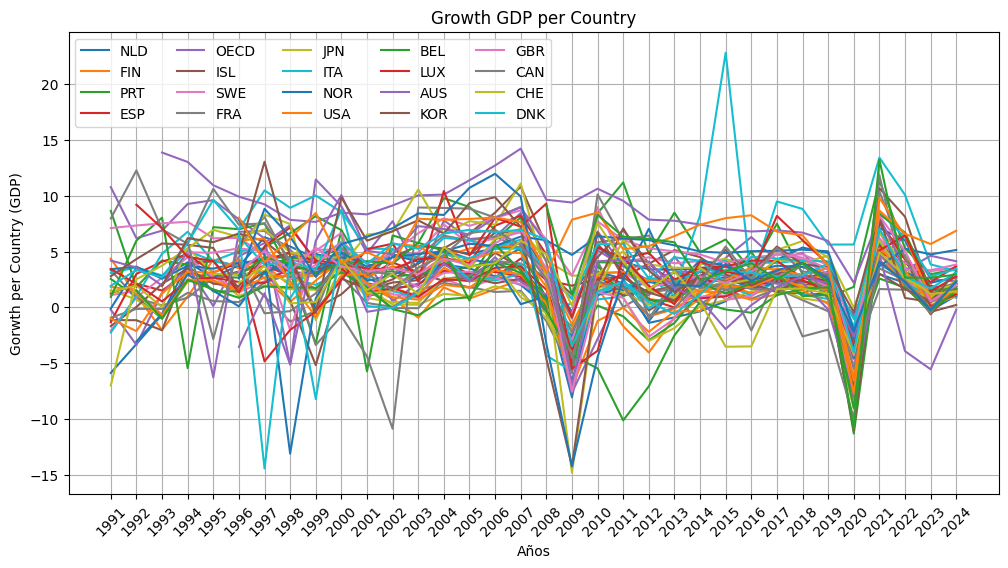

In [ ]:
# Graficar la evolución de los países
plt.figure(figsize=(12, 6))  # Tamaño del gráfico

# Iterar sobre las columnas (países) y graficar cada una
for column in data_transposed.columns[1:]:
    plt.plot(data_transposed.index[20:], data_transposed[column][20:])
    

# country_acronyms = data_transposed.columns
plt.title('Growth GDP per Country')
# plt.legend(labels=country_acronyms, loc='best', title='Países')

plt.xlabel('Años')
plt.ylabel('Gorwth per Country (GDP)')

plt.legend(data_transposed[data_transposed.columns[:20]], loc =2,ncol =5)

plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Los 20 países con la mejor evolución historica

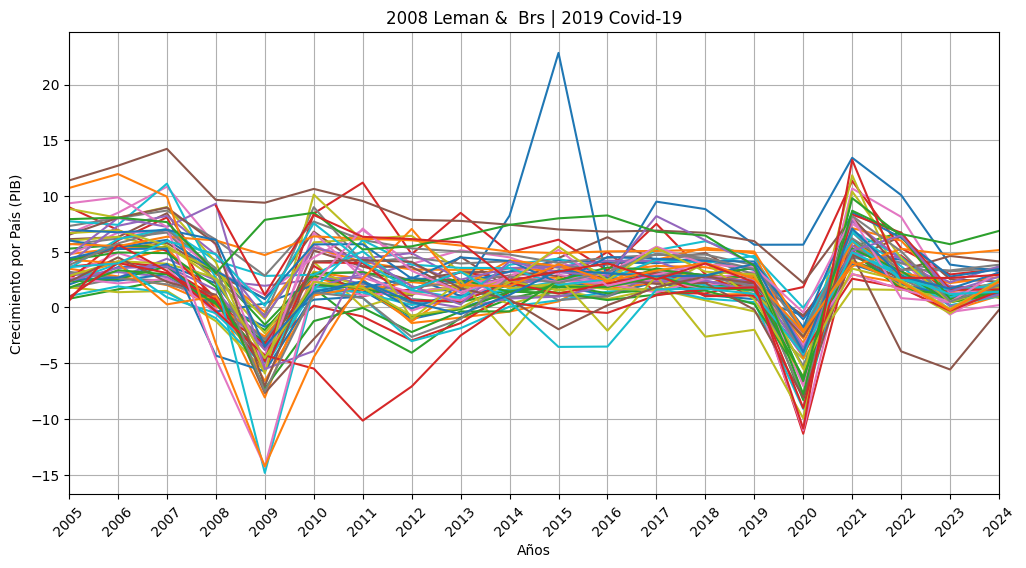

In [ ]:
# Graficar la evolución de los países
plt.figure(figsize=(12, 6))  # Tamaño del gráfico

# Iterar sobre las columnas (países) y graficar cada una
for column in data_transposed.columns:
    plt.plot(data_transposed.index, data_transposed[column])

plt.title('2008 Leman &  Brs | 2019 Covid-19')
plt.xlabel('Años')
plt.ylabel('Crecimiento por País (PIB)')

plt.xticks(rotation=45)
plt.grid(True)

plt.xlim('2005', data_transposed.index[-1])  # Utilizar el último índice como límite superior

plt.show()



## Inflation quartil + global



In [ ]:
inflation_Q = pd.read_csv('Inflaccion quartiles.csv')
inflation_Q.head()



,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUT,CPIFORECAST,TOT,AGRWTH,Q,2000-Q4,2.131878,NaN
1,AUT,CPIFORECAST,TOT,AGRWTH,Q,2001-Q1,2.002017,NaN
2,AUT,CPIFORECAST,TOT,AGRWTH,Q,2001-Q2,2.678060,NaN
3,AUT,CPIFORECAST,TOT,AGRWTH,Q,2001-Q3,2.519742,NaN
4,AUT,CPIFORECAST,TOT,AGRWTH,Q,2001-Q4,1.999820,NaN


In [ ]:
# Regrex para visual años
inflation_Q['TIME'] = inflation_Q['TIME'].str.replace('-Q\d+', '', regex=True)


grafica 8

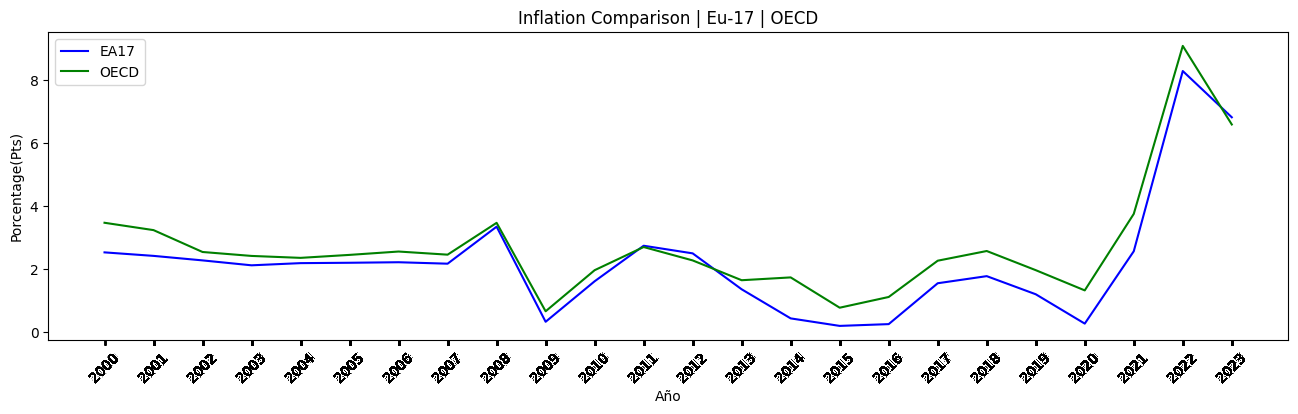

In [ ]:
# plotearINFLACION_Q


# plotear EA17 
ea17_inflation = inflation_Q.loc[inflation_Q['LOCATION'] == 'EA17']
ea17_inflation_grouped = ea17_inflation.groupby('TIME')['Value'].mean().reset_index()
# plotear OECD
oecd_inflation = inflation_Q.loc[inflation_Q['LOCATION'] == 'OECD']
oecd_inflation_grouped = oecd_inflation.groupby('TIME')['Value'].mean().reset_index()


plt.figure(figsize=(16, 4))
# Añadir ambos ocd y world
plt.plot(ea17_inflation_grouped['TIME'], ea17_inflation_grouped['Value'],color='b',label='EA17') #blue
plt.plot(oecd_inflation_grouped['TIME'], oecd_inflation_grouped['Value'],color='g',label='OECD') #green


# Titulo leyenda y ejes
plt.title('Inflation Comparison | Eu-17 | OECD')
plt.xlabel('Año')
plt.ylabel('Porcentage(Pts)')
plt.legend()


plt.xticks(inflation_Q['TIME'],rotation=45)
plt.show()

In [ ]:
df_infla = pd.read_csv('InflacioGlobal.csv')
# df_infla

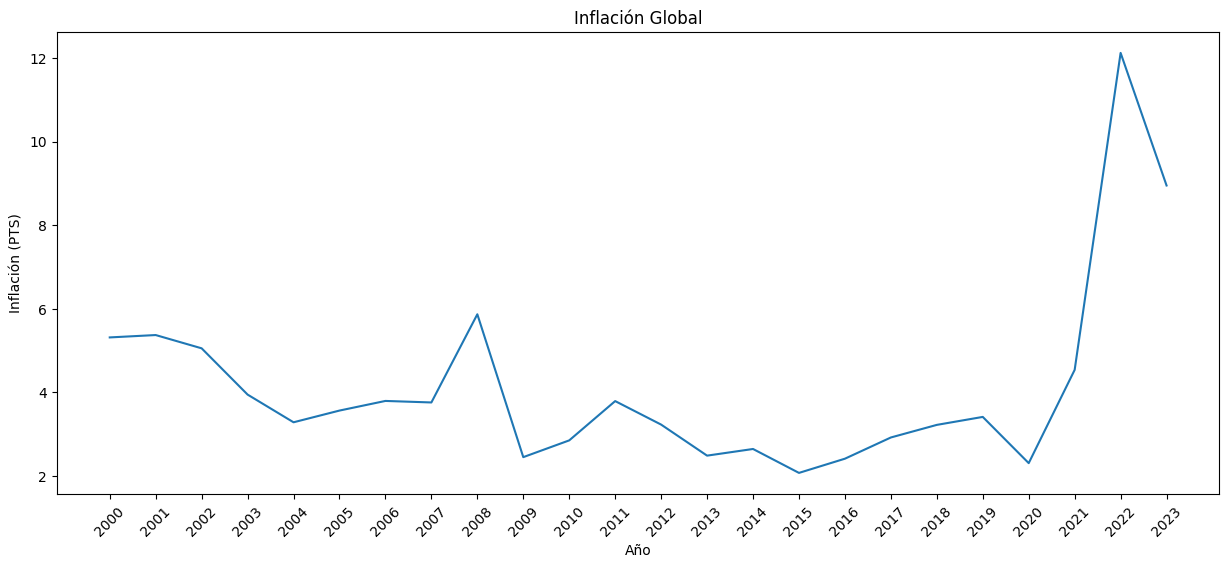

In [ ]:


# Calcular la inflación promedio por año
df_global = df_infla.groupby('TIME')['Value'].mean().reset_index()

# Crear la gráfica de línea

plt.figure(figsize=(15, 6))

plt.plot(df_global['TIME'], df_global['Value'])
plt.title('Inflación Global')
plt.xlabel('Año')
plt.ylabel('Inflación (PTS)')
plt.xticks(df_global['TIME'], rotation=45)
plt.show()


Gráficos de líneas (Line plots):
 series de tiempo de la inflación y el GDP global a lo largo de los años.

Gráficos de barras (Bar plots):
representar el consumo, el gasto y los ingresos turísticos para cada país en un año específico.
 mostrar comparaciones entre diferentes países para un año determinado.

Gráficos de barras apiladas (Stacked bar plots):
 la composición del consumo y el gasto por categorías específicas, como alimentos, transporte, etc.

Gráficos de dispersión (Scatter plots):
trazar la relación entre el GDP global y los ingresos turísticos para cada país en un año determinado.
También puedes explorar la relación entre la inflación y el consumo para diferentes países.

Gráficos de correlación (Correlation plots):
r mapas de calor para visualizar la matriz de correlación entre todas las variables (inflación, GDP, consumo, gasto, etc.).

Gráficos de área (Area plots):
 la evolución del consumo y el gasto a lo largo de los años utilizando gráficos de áreas apiladas.